In [2]:
import pickle
import gensim
import pandas as pd
import numpy as np

In [3]:
# load files
with open('../../bin/vocab.sudachi.core.chive_mc90.pkl', 'rb') as f:
    vocab = pickle.load(f)

vectors = gensim.models.KeyedVectors.load("/data/chive_v1.2mc90/chive-1.2-mc90_gensim/chive-1.2-mc90.kv")

In [12]:
voc_words = set([vocab.itos[i] for i in range(len(vocab))])
vec_words = set(vectors.vocab.keys())

In [26]:
n_voc = len(voc_words)
n_vec = len(vec_words)
n_intersection = len(voc_words & vec_words)
n_voc_only = len(voc_words - vec_words)
n_vec_only = len(vec_words - voc_words)

In [27]:
print(n_voc)
print(n_vec)

75972
482238


In [28]:
print(n_intersection + n_voc_only)
print(n_intersection + n_vec_only)

75972
482238


In [33]:
# voc にしか含まれない（学習用データにしか含まれない；分散表現上 unknown となる）語が 27866 語
n_voc_only

27866

In [55]:
# check 観点：（分散表現による学習用データ語彙のカバレッジ）学習用データのトークンのうち、分散表現が割り当てられるトークンは十分数あるか？
# 確認結果：カバーされない語は、学習用データにおいて比較的低頻度語
# -> 今回は問題ない（必要に応じ、unknown への対策を考える）

,freq
count,27866.000000
mean,17.551640
std,409.697638
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,59966.000000


<AxesSubplot:>

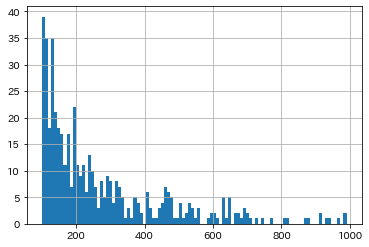

In [73]:
# 分散表現語彙によってカバーされない、学習用データの語の出現頻度
voc_words_only = list(voc_words - vec_words)
voc_words_only_freq = [vocab.freqs[w] for w in voc_words_only]
voc_words_only_freq = pd.DataFrame({'freq': voc_words_only_freq})
display(voc_words_only_freq.describe())

voc_words_only_freq.query('100 < freq < 1000')['freq'].hist(bins=100)

,freq
count,48106.000000
mean,70.839417
std,1774.808271
min,1.000000
25%,1.000000
50%,3.000000
75%,11.000000
max,167137.000000


<AxesSubplot:>

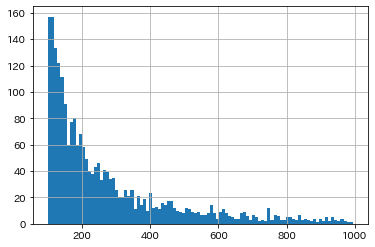

In [80]:
# 分散表現語彙によってカバーされる、学習用データの語の出現頻度
intersection = voc_words & vec_words
intersection_freq = [vocab.freqs[w] for w in list(voc_words) if w in intersection]
intersection_freq = pd.DataFrame({'freq': intersection_freq})
display(intersection_freq.describe())

intersection_freq.query('100 < freq < 1000')['freq'].hist(bins=100)

削除できる？

In [4]:
len(vocab)

75972

In [5]:
# vocab から語を除外できるか？
# -> できるが、そういう問題ではない（後述）

# 削除前
print(vocab.stoi["私"])
print(vocab.itos[145])

# 削除
del vocab.stoi['私']
del vocab.itos[145]

145
私


In [6]:
# 削除後（削除されているか？インデックスは変わるか？）
print(vocab.stoi["私"])
print(vocab.itos[145])

0
そんな


In [7]:
len(vocab)

75971

In [ ]:
# vocab.stoi はそのままマッピングテーブルとして使えるものであるべき
# → vocab 構築にあたり、embedding に含まれない語ははじめから除外すればよいはず
# （問題ないか、記事探す、あるいは公式ドキュメント見る）